In [2]:
import pandas as pd

In [35]:
df = pd.read_csv("4n1tpn.txt")
prom = {}
for _, row in df.iterrows():
    stringbuf = str(row["De"])+";"+str(row["A"])
    if not stringbuf in prom.keys():
        prom[stringbuf] = float(row["Tiempo"])
    else:
        prom[stringbuf] += float(row["Tiempo"])

dfProm = pd.DataFrame(
{"Comunicación" : prom.keys(),
"Tiempo" : prom.values()
}
)

de = []
a = []
for _, row in dfProm.iterrows():
    comm = row["Comunicación"]
    comm = comm.split(sep=";")
    de.append(comm[0])
    a.append(comm[1])

dfProm["De"] = de
dfProm["A"] = a
dfProm["Tiempo"] = dfProm["Tiempo"] / (len(df["De"]/len(dfProm["Comunicación"])))
dfProm.drop("Comunicación", axis=1, inplace=True)

In [38]:
df2 = pd.read_csv("4n2tpn.txt")
prom2 = {}
for _, row in df2.iterrows():
    stringbuf = str(row["De"])+";"+str(row["A"])
    if not stringbuf in prom2.keys():
        prom2[stringbuf] = float(row["Tiempo"])
    else:
        prom2[stringbuf] += float(row["Tiempo"])

dfProm2 = pd.DataFrame(
{"Comunicación" : prom2.keys(),
"Tiempo" : prom2.values()
}
)

de = []
a = []
for _, row in dfProm2.iterrows():
    comm = row["Comunicación"]
    comm = comm.split(sep=";")
    de.append(comm[0])
    a.append(comm[1])

dfProm2["De"] = de
dfProm2["A"] = a
dfProm2["Tiempo"] = dfProm2["Tiempo"] / (len(df2["De"]/len(dfProm2["Comunicación"])))
dfProm2.drop("Comunicación", axis=1, inplace=True)
dfProm2

,Tiempo,De,A
0,0.004977,0.0,1.0
1,0.008167,0.0,2.0
2,0.007970,0.0,3.0
3,0.008120,0.0,4.0
4,0.007754,0.0,5.0
5,0.007530,0.0,6.0
6,0.007263,0.0,7.0
7,0.003705,1.0,0.0
8,0.007863,1.0,2.0
9,0.007037,1.0,3.0


In [43]:
estad = pd.DataFrame(
    {
        "Promedio 4n1t" : [dfProm["Tiempo"].mean()],
        "Desvío 4n1t" : [dfProm["Tiempo"].std()],
        "Promedio 4n2t" : [dfProm2["Tiempo"].mean()],
        "Desvío 4n2t" : [dfProm2["Tiempo"].std()]
    }
)
print(estad.to_latex())
estad

\begin{tabular}{lrrrr}
\toprule
 & Promedio 4n1t & Desvío 4n1t & Promedio 4n2t & Desvío 4n2t \\
\midrule
0 & 0.032750 & 0.003092 & 0.006535 & 0.001886 \\
\bottomrule
\end{tabular}



,Promedio 4n1t,Desvío 4n1t,Promedio 4n2t,Desvío 4n2t
0,0.03275,0.003092,0.006535,0.001886


In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

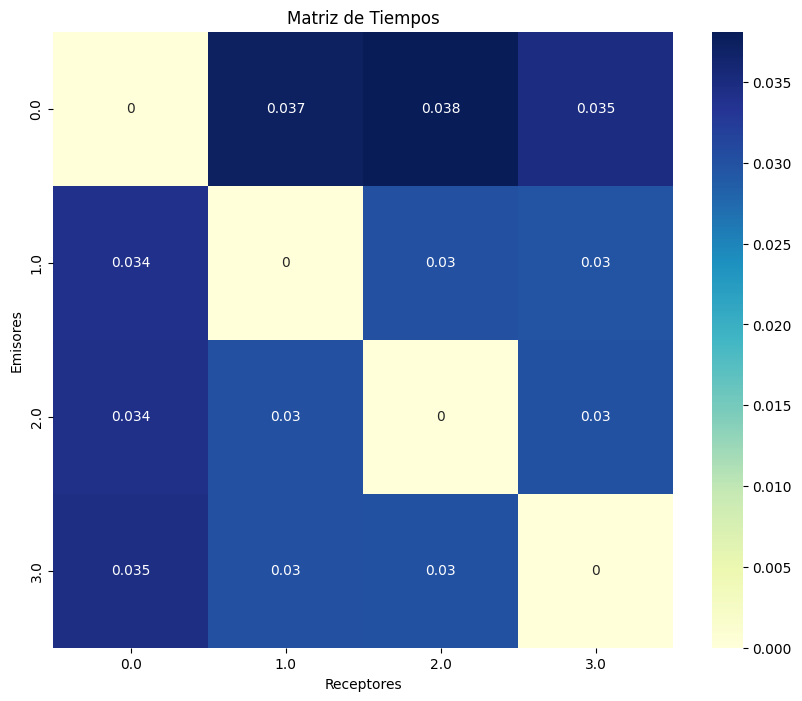

In [48]:
elementos = sorted(pd.concat([dfProm["De"], dfProm["A"]]).unique())
num = len(elementos)
matriz = np.zeros((num, num))

for _, row in dfProm.iterrows():
    de_idx = elementos.index(row["De"])
    a_idx = elementos.index(row["A"])
    matriz[de_idx, a_idx] = row["Tiempo"]

plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, cmap="YlGnBu", xticklabels=elementos, yticklabels=elementos)
plt.title("Matriz de Tiempos")
plt.xlabel("Receptores")
plt.ylabel("Emisores")
plt.savefig("salida/matriz1.png")
plt.show()

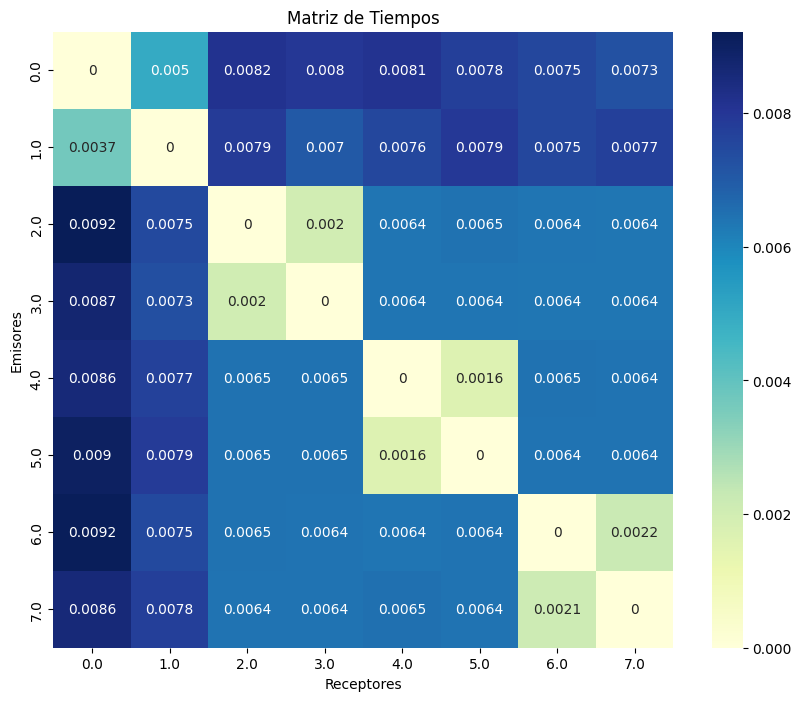

In [49]:
elementos = sorted(pd.concat([dfProm2["De"], dfProm2["A"]]).unique())
num = len(elementos)
matriz = np.zeros((num, num))

for _, row in dfProm2.iterrows():
    de_idx = elementos.index(row["De"])
    a_idx = elementos.index(row["A"])
    matriz[de_idx, a_idx] = row["Tiempo"]

plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, cmap="YlGnBu", xticklabels=elementos, yticklabels=elementos)
plt.title("Matriz de Tiempos")
plt.xlabel("Receptores")
plt.ylabel("Emisores")
plt.savefig("salida/matriz2.png")
plt.show()